<a id="top"></a>
<h1 style="font-size:50px; color:#3A71AE"><center>Communicate Data Findings Project</center></h1>

<a id="id_1"></a>
<h1 style="font-size:30px; color:#3A71AE">COVID-19 Pandemic</h1>

The [**COVID-19**](https://www.undp.org/content/undp/en/home/coronavirus.html) pandemic is the defining global health crisis of our time and the greatest challenge we have faced since World War Two. Since its emergence in Asia late last year, the virus has spread to every continent except Antarctica.

But the **pandemic** is much more than a `health crisis`, it's also an unprecedented `socio-economic crisis`. Stressing every one of the countries it touches, it has the potential to create devastating social, economic and political effects that will leave deep and longstanding scars. UNDP is the technical lead in the UN’s socio-economic recovery, alongside the health response, led by WHO, and the Global Humanitarian Response Plan, and working under the leadership of the UN Resident Coordinators.

In this **project**, I'm will try to find some `insights` and/or `answers` that may help people or reduce suffering due to this pandemic.

<a id="id_2"></a>
<h1 style="font-size:30px; color:#3A71AE">The Dataset</h1>

**The data** I will be using (and analyzing and visualizing) is dataset about **Coronavirus** Pandemic (COVID-19) avalibale via [**Our World in Data**](https://ourworldindata.org/coronavirus) website.

According to [WikiPedia](https://en.wikipedia.org/wiki/Our_World_in_Data), **Our World in Data** (OWID) is a scientific online publication that focuses on large global problems such as poverty, disease, hunger, climate change, war, existential risks, and inequality.

The trajectories show the daily number of confirmed cases. But the widely available data on confirmed cases only becomes meaningful when it can be interpreted in light of how much a country is testing. This is why **Our World in Data** built the [global database on COVID-19 testing](https://ourworldindata.org/coronavirus-testing) and the line colors in this chart show whether a country is testing adequately or not.

This **dataset** has `41` variables and `45,207` records

In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# Setting the dark grid style
sb.set(style="darkgrid")

# Setting DPI and default figure size
plt.rcParams['figure.dpi']= 100
plt.rcParams["figure.figsize"] = [10, 4]

# Create category to set 'date' data type to datetime
def set_datetime_type(df):
    df['date'] = pd.to_datetime(df['date'])
    
# Creating two functions to replace datatypes for continent and test_units with new ones
def set_continent_dtype(df):
    continents_unique = pd.Series(df['continent'].unique()).dropna()
    # Creating new categorical type
    continent_category = pd.CategoricalDtype(continents_unique)
    # Replaceing old data type with new ones
    df['continent'] = df['continent'].astype(continent_category)

def set_test_units_dtype(df):
    test_units_unique = pd.Series(df['test_units'].unique()).dropna()
    unit_types_category = pd.CategoricalDtype(test_units_unique)
    df['test_units'] = df['test_units'].astype(unit_types_category)
    
# df names
dfs = ['country', 'corona', 'economy', 'pop', 'healthcare', 'social']

# Reading each df from 'data' directory using the string name by using 'vars()' function.
for df_ in dfs:
    df_name = df_.split('_')[0]
    vars()[df_name] = pd.read_csv('data/{}_clean.csv'.format(df_), low_memory = False)
    # Resetting the pre-changed variables data types
    if df_ == 'country':
        set_continent_dtype(country)
    elif df_ == 'corona':
        set_datetime_type(corona)
        set_test_units_dtype(corona)

<a id="id_4"></a>
<h1 style="font-size:30px; color:#3A71AE">Investigation Overview</h1>

I used this **dataset** to answer my questions about the world pandemic **Covid-19**.

Through the multiple **Data Wrangling** process, `Gathering`, `Assessing` and `Cleaning` the data. 

Generally, the dataset was already in a clean format, but some slight cleaning issues needed to be addressed. Also, I divided the data into six different tables are  `country`, `corona`, `economy`, `pop`, `healthcare`, `social` depending on each variable category.

**Note:** This project is dated `21-9-2020`.

<a id="id_5"></a>
<h1 style="font-size:30px; color:#3A71AE">Communication and Visualizing</h1>

Let's Communicate the insights we have found in **Exploring and Analyzing** step, through polishing the visuals we have created in that step to create an **explanatory** data visualization.

**The questions we had:**
1. [**What's The Infection Ratio For Each Continent?**](#id_5_1)
2. [**What are The Top 10 Infected Countries?**](#id_5_2)
3. [**Does Smoking Habit Affect Corona Infection and Death Rates?**](#id_5_3)
4. [**Does Government Stringency Policies Reduced Infection Rates?**](#id_5_4)
5. [**What's the Monthly State for Corona Cases and Deaths?**](#id_5_5)
6. [**What's The World Situation for Now?**](#id_5_6)

<a id="id_5_1"></a>
### [**What's The Infection Ratio For Each Continent?**](#id_5_1)
**South America** has the highest `infection rate` with `1.75%` followed by **North America** with `1.39%` and **Europe** with `0.59%` etc.

In [2]:
# Getting total cases to the toal population for each continent 
cont_cases = corona.merge(country, on = 'country_code').groupby('continent')['new_cases'].sum()
country_pop = country.merge(pop, on = 'country_code').groupby('continent')['population'].sum()
pop_cases_ratio = (cont_cases / country_pop) * 100 # infected ratio

pop_cases_ratio = pop_cases_ratio.sort_values() # Sort values in ascending order

x_ordered = pop_cases_ratio.index # Get x labels and order

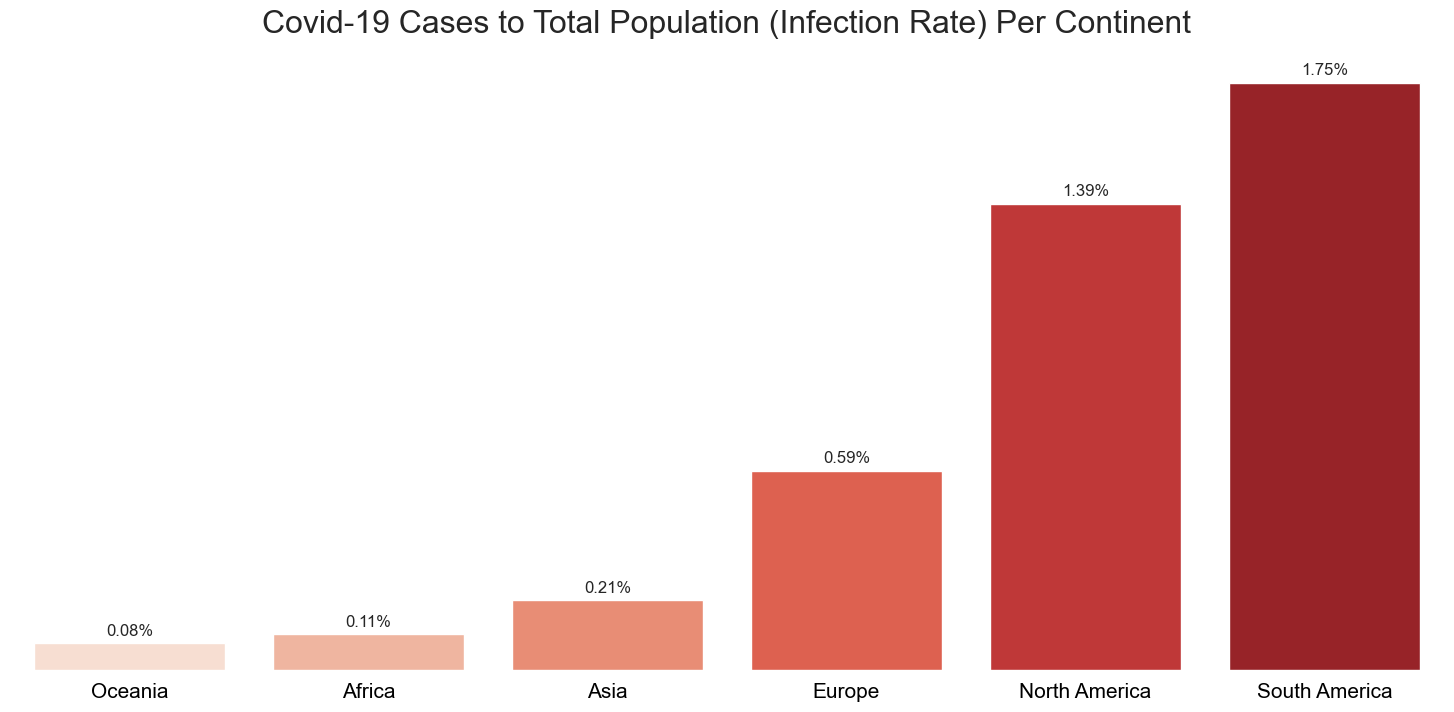

In [3]:
sb.set(style='white') # Set seaborn style

fig, ax = plt.subplots(figsize=[14.70, 7.27]) # Create figure and axes with default figure size

muted_color = sb.color_palette('dark')[3]

sb_barplot = sb.barplot(ax = ax, x = x_ordered, y = pop_cases_ratio, order = x_ordered, palette = 'Reds') # Crea bar plot
sb.despine(left=True, bottom=True) # Remove plot borders

for p in sb_barplot.patches: # Add annotation for each patch
    sb_barplot.annotate(text       = format(p.get_height(), '.2f')+'%',
                        xy         = (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha         = 'center', va = 'center',
                        xytext     = (0, 9),
                        textcoords = 'offset points')

plt.xticks(fontsize=15, color = 'black') # Increase x ticks labels font size
plt.yticks([]) # Remove y ticks

plt.xlabel('') # Remove x label

plt.title('Covid-19 Cases to Total Population (Infection Rate) Per Continent', y = 1.02, fontsize = 23); # Add descriptive title

plt.tight_layout() # Improve appearance

<a id="id_5_2"></a>
## [What are The Top 10 Infected Countries?](#id_5_2)
**Peru**, **Brazil**, and **Argentina** are the `top 3` infected countries (they are all from **South America**, the `most infected continent`).

In [4]:
# Creating function that subsetting a df with a specified variables then getting max variables for one of them
# For computing total cases each continent, country, etc.
def get_max_cate(df, lis, max_v):
    return df[lis].sort_values('country_code').groupby('country_code')[max_v].max()

# Total cases per country
corona_country = get_max_cate(corona, ['country_code', 'total_cases'], 
                              ['total_cases']).reset_index()

# Subsetting the want variables
pop_country = pop[['country_code', 'population']]
country_names = country[['country_code','country_name']]

# Merging the different variables from different tables
country_names_corona = corona_country.merge(pop_country, on = 'country_code').merge(country_names, on = 'country_code')

# Calculating infected ratio
country_names_corona['infected_ratio'] = (country_names_corona['total_cases'] / country_names_corona['population']) * 100

# Total cases per country
country_tests = corona[['country_code', 'total_tests']].groupby('country_code').max().dropna().reset_index()

# Merging the different variables from different tables
country_names_tests = country_names_corona.merge(country_tests, on = 'country_code')

# Calculating test ratio
country_names_tests['test_ratio'] = (country_names_tests['total_tests'] / country_names_tests['population']) * 100

# Getting the top 10 infected country after accounting for test ratio
top_infected_countries = country_names_tests.loc[country_names_tests['infected_ratio'].nlargest(100).index]
top_infected_countries = top_infected_countries.query('test_ratio < 5').reset_index(drop = True)[:10]

# Shorten 'Dominican Republic' name
top_infected_countries = top_infected_countries.replace('Dominican Republic', 'Dominican Rep.')
# Get country names
country_names = top_infected_countries['country_name']

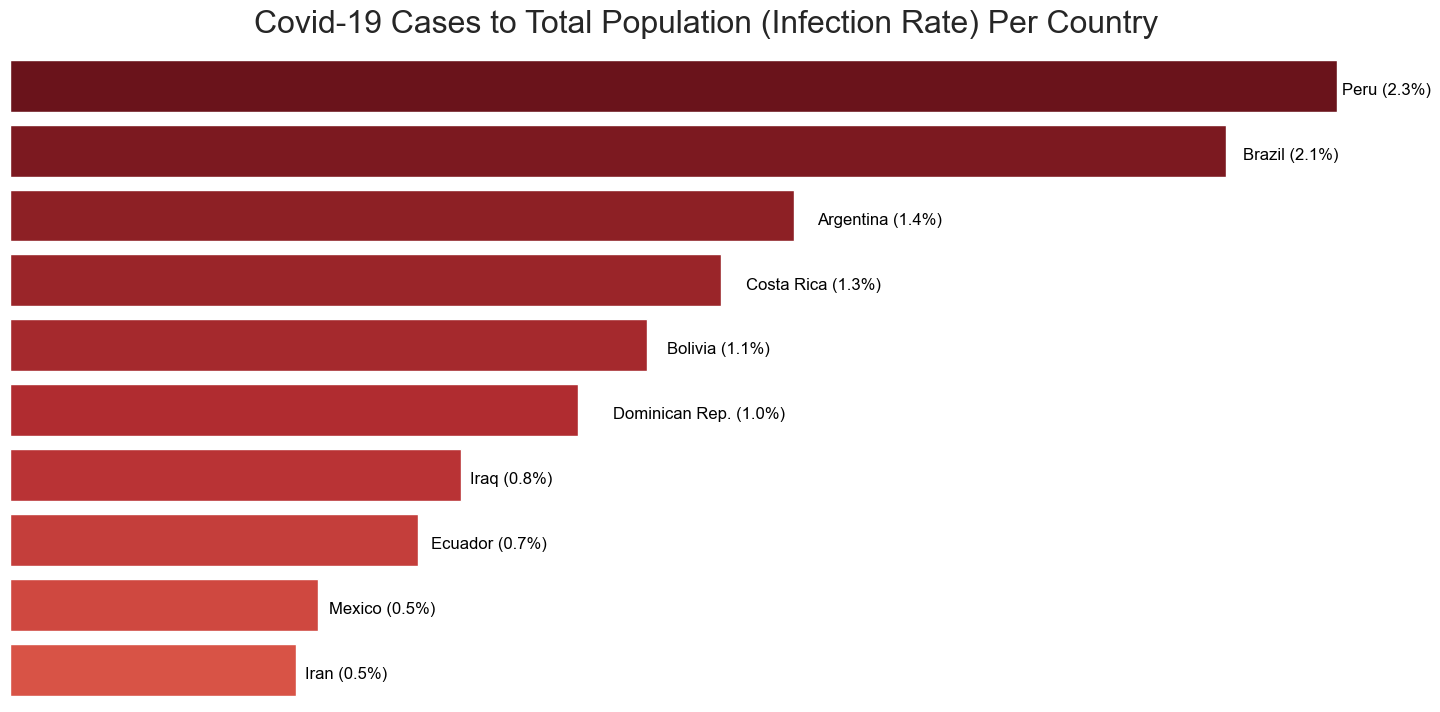

In [5]:
fig, ax = plt.subplots(figsize=[14.70, 7.27]) # Create figure and axes with default figure size

# I'm chossing the 'top 10 darker' reds from color_palette("Reds_r", 25) to visual the 'top infected' country
dark_reds = sb.color_palette("Reds_r", 25)[:-15]

sb_barplot = sb.barplot(data  = top_infected_countries, 
                        y     = 'country_name', 
                        x     = 'infected_ratio',
                        palette = dark_reds) # Crea bar plot

sb.despine(left=True, bottom=True) # Remove plot borders

for name, p in zip(country_names, sb_barplot.patches): # Add annotation for each patch
    len_name = len(name)/80
    sb_barplot.annotate(text       = name+' ('+format(p.get_width(), '.1f')+'%'+')', 
                        xy         = (p.get_width()+len_name-0.06, p.get_y() + p.get_height() / 1.75), 
                        ha         = 'center',
                        va         = 'center', 
                        xytext     = (40, 0), 
                        textcoords = 'offset points',
                        color = 'black')
    
plt.xticks([]) # Remove x ticks
plt.yticks([]) # Remove y ticks

plt.xlabel('') # Remove x label
plt.ylabel('') # Remove y label

plt.title('Covid-19 Cases to Total Population (Infection Rate) Per Country', y = 1.02, fontsize = 23) # Add descriptive title

plt.tight_layout()# Improve appearance

<a id="id_5_3"></a>
## [Does Smoking Habit Affect Corona Infection and Death Rates?](#id_5_3)
The question of **Covid-19** being `more dangerous` on `smokers` than `non-smokers` has not been confirmed yet, so, `population-based studies` are needed to address this question.

In [6]:
# Preparing the data
corona_cn = corona.merge(country, on = 'country_code')

# Total cases and deaths per country
corona_cn_sum = corona_cn.groupby('country_code').sum().reset_index()[['country_code',
                                                                       'new_cases', 
                                                                       'new_deaths',]]
# Modifying columns names
corona_cn_sum.columns = pd.Series(corona_cn_sum.columns.values).replace({'new_cases': 'total_cases',
                                                                         'new_deaths': 'total_deaths'})
# adding smokers and population stats
corona_cn_sm = corona_cn_sum.merge(healthcare[['country_code',
                                               'female_smokers',
                                               'male_smokers']],
                                   on = 'country_code').merge(pop[['country_code',
                                                                   'population']],
                                                              on = 'country_code')

# total smokers ratio per population (males + females ratios)
corona_cn_sm['smokers_ratio'] = corona_cn_sm['female_smokers'] + corona_cn_sm['male_smokers']
corona_cn_sm['total_cases_ratio'] =  (corona_cn_sm['total_cases'] / corona_cn_sm['population']) * 100 # infection ratio
corona_cn_sm['total_deaths_ratio'] = (corona_cn_sm['total_deaths'] / corona_cn_sm['population']) * 100 # deaths ratio

corona_cn_sm_r = corona_cn_sm[['smokers_ratio', 'total_cases_ratio', 'total_deaths_ratio']]

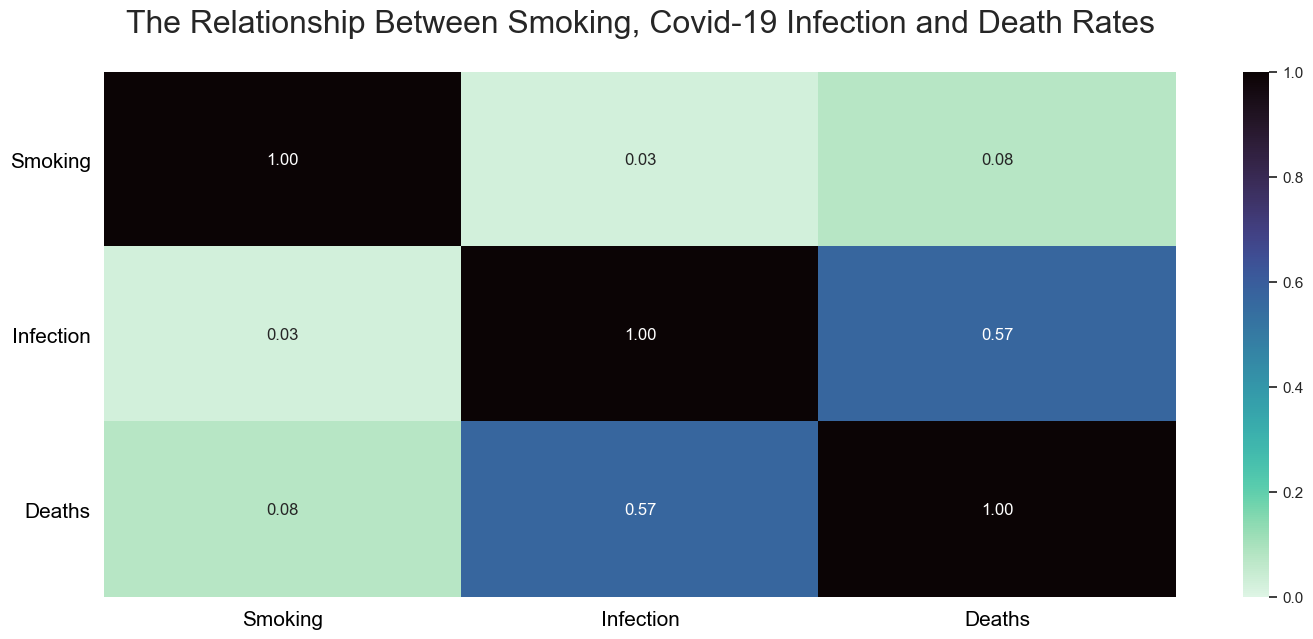

In [7]:
# Setting ticks labels
ticks_labels = ['Smoking', 'Infection', 'Deaths']

plt.figure(figsize=[14.70, 6.54]) # Create figure with default figure size

# Creating heatmap plot
sb.heatmap(corona_cn_sm_r.corr(),
           cmap = 'mako_r',
           annot = True,
           fmt = '.2f',
           cbar = True,
           xticklabels = ticks_labels,
           yticklabels = ticks_labels,
           vmin=0)

# Adding title
plt.title('The Relationship Between Smoking, Covid-19 Infection and Death Rates', fontsize=23, y = 1.06)

# Adding x and y ticks
plt.xticks(fontsize = 15, color = 'black')
plt.yticks(fontsize = 15, color = 'black', rotation = 0)

plt.tight_layout() # Improve appearance

<a id="id_5_4"></a>
## [Does Government Stringency Policies Reduced Infection Rates?](#id_5_4)

Generally, we can say that **government stringency** policies have failed to control **Covid-19** pandemic. Thus, we need to find better and more effective solutions.

In [8]:
# Get top 5 countries other than 'OWID_WRL'
country_top_cases = country_names_corona.loc[country_names_corona['total_cases'].nlargest(7).index][1:]
strin_ind = corona[['total_cases', 'country_code', 'date' ,'stringency_index']]

top_inf_strin = strin_ind[strin_ind['country_code'].isin(country_top_cases['country_code'].values)].reset_index(drop = True)
top_inf_strin['stringency_index'] = top_inf_strin['stringency_index'].shift(14)

# Adding country names
top_inf_strin = top_inf_strin.merge(country[['country_code', 
                                             'country_name']], 
                                    on = 'country_code')

# Removing year 2019
top_inf_strin = top_inf_strin[top_inf_strin['date'] > '2019-12-31']

# Adding months
top_inf_strin['month'] = top_inf_strin['date'].apply(lambda x: x.month)
unique_top_inf = pd.Series(top_inf_strin['country_name'].unique()).sort_values(ascending = False).reset_index(drop = True)

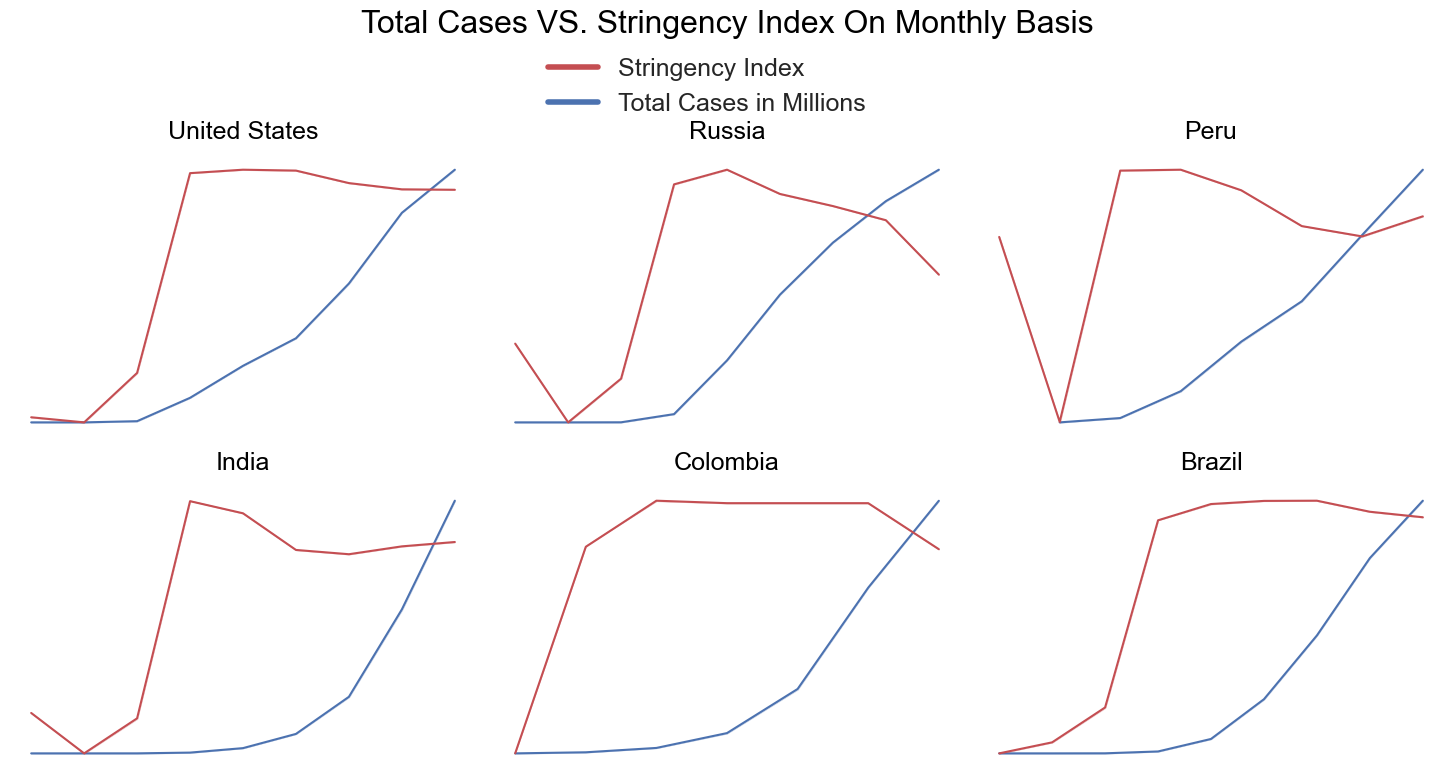

In [9]:
# Create figure with 3*2 subplots
fig, axes_sub = plt.subplots(2, 3, figsize=[14.70, 7.27]) # Create figure and axes with default figure size

# Create custome lines
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4)]

# Add custome legend
fig.legend(handles = custom_lines,
           fontsize = 18,
           labels = ['Stringency Index', 'Total Cases in Millions'],
           frameon = False,
           bbox_to_anchor = [0.61, 1.03])


# Flatten axes array
axes = axes_sub.flatten()

# Add common title
fig.suptitle('Total Cases VS. Stringency Index On Monthly Basis', fontsize=23, y = 1.065, color = 'black')

# Create plots for each top 6 infected countries
# total_cases vs. stringency_index
for ax_n, country_name in zip(range(6), unique_top_inf):
    ax = axes[ax_n] # Current axis
    
    country_data = top_inf_strin[top_inf_strin['country_name'] == country_name] # Subsetting the data to the current country
    
    # Add first axis as 'total_cases'
    sb.lineplot(ax = ax, data = country_data, x = "month", y = "total_cases", legend=False, ci=0) 
    
    ax2 = ax.twinx() # Creating second axis as twin of the first axis
    
    # Add second axis as 'stringency_index'
    sb.lineplot(data = country_data, x = "month", y = "stringency_index", ax = ax2, legend = False, color = "r", ci=0)
    
    # Add title for the current plot
    ax.set_title(country_name, fontsize = 18, color = 'black', y = 1.035)
    
    # Remove ticks from axes
    ax.set_xticks([]), ax.set_yticks([]), ax2.set_yticks([])
    
    # Remove labels from axes
    ax.set_xlabel(''), ax.set_ylabel(''), ax2.set_ylabel('')
    
    ax.set_facecolor('xkcd:white') # Setting face color to white
    
    sb.despine(left=True, bottom=True) # Remove plot borders

plt.tight_layout() # Improve appearance

<a id="id_5_5"></a>
## [What's the Monthly State for Corona Cases and Deaths?](#id_5_5)
The recent increase in infection rates does not bode well, so, a lot of healthcare organizations had predicted a second wave of **Covid-19**, thus, we must all prepare for it!!

In [10]:
# Subsetting and preparing the data
daily_cases = corona[['country_code', 'date', 'new_cases', "new_deaths"]].groupby(['date']).sum().reset_index()
daily_cases = daily_cases[daily_cases['date'] > '2019-12-31'] # Exclude dates before 2020
daily_cases['new_cases_norm'] = round(daily_cases['new_cases'] / 1e5, 1) # Normalizing the numbers by 100,000
daily_cases['new_deaths_norm'] = round(daily_cases['new_deaths'] / 1e3, 1) # Normalizing the numbers by 1000

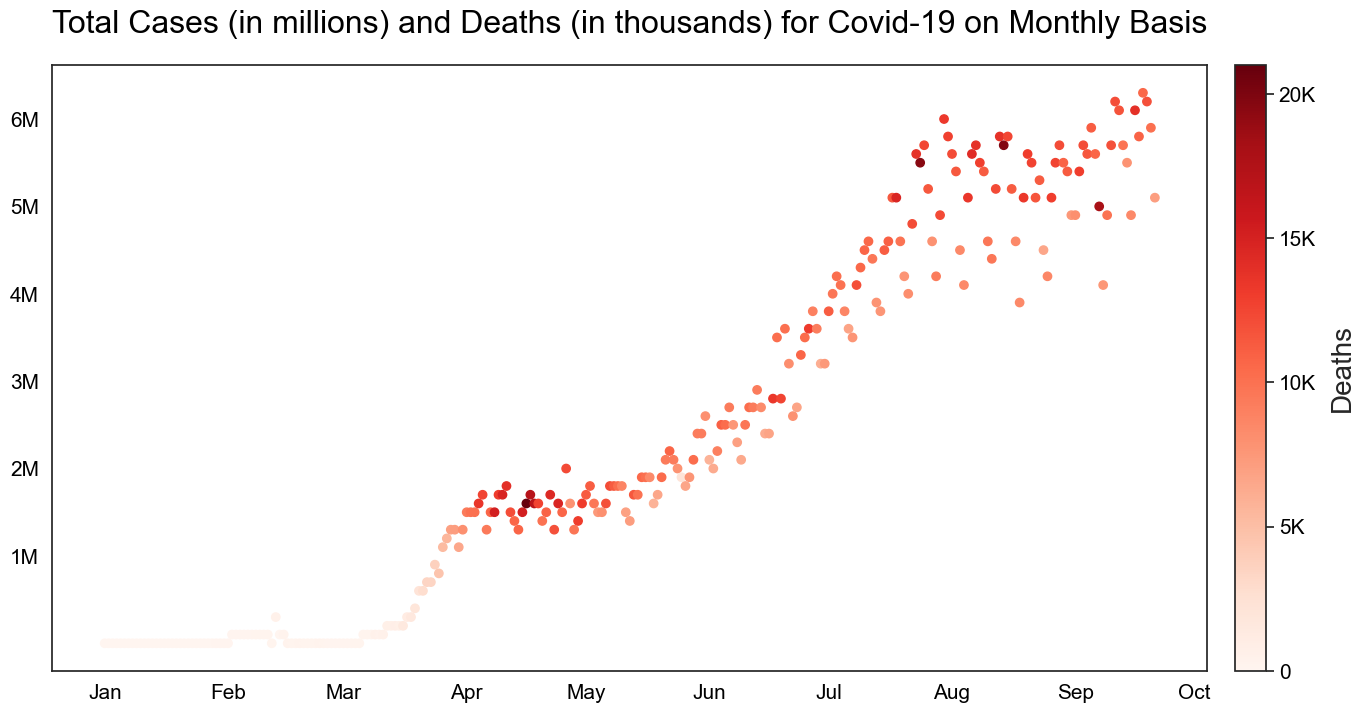

In [11]:
plt.figure(figsize=[14.70, 7.27]) # Create figure with default figure size

# Add customized scatter plot
plt.scatter(data = daily_cases,
            x = 'date',
            y = 'new_cases_norm',
            c = 'new_deaths_norm',
            cmap = 'Reds')

plt.title('Total Cases (in millions) and Deaths (in thousands) for Covid-19 on Monthly Basis', 
          color = 'black',
          fontsize=23,
          y = 1.04)

# Customize x ticks and labels
xticks, xticklabdels = plt.xticks()[0], np.append(daily_cases['date'].dt.month_name().str[:3].unique(), 'Oct')
plt.xticks(ticks = xticks, labels = xticklabdels, color = 'black', fontsize = 15)

# Customize y ticks and labels
yticks, yticklabdels = [0, 1, 2, 3, 4, 5, 6], ['', '1M', '2M', '3M', '4M', '5M', '6M']
plt.yticks(ticks = yticks, labels = yticklabdels, color = 'black', fontsize = 15)

# Customize color bar ticks and labels
cbar = plt.colorbar(pad=.02)
cbar.set_label('Deaths', fontsize = 20, labelpad = 10)
cbarticks, cbarlabels = [ 0,  5, 10, 15, 20], [ '0',  '5K', '10K', '15K', '20K']
cbar.set_ticks(cbarticks), cbar.set_ticklabels(cbarlabels)
cbar.ax.tick_params(labelsize=15, labelcolor='black')

plt.tight_layout() # Improve appearance

<a id="id_5_6"></a>
## [What's The World Situation for Now?](#id_5_6)
`USA`, `Rusa`, `Peru` and `Brazil` are the **top infected** countries with **Covid-19**, also `South America` is the **most infected** continent.

In [12]:
# Total cases each country
country_tot_cases = corona.merge(country, on = 'country_code').groupby('country_name')['new_cases'].sum()

# set the filepath and load
fp = 'data/shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp'

#reading the file stored in variable fp
world = gpd.read_file(fp)

world = world[world.CNTRY_NAME!="Antarctica"]

# Adding corona stats to world map
world_cases = world.merge(country_tot_cases, 
                          left_on = 'CNTRY_NAME', 
                          right_on = 'country_name').rename(columns={'new_cases': 'total_cases'})

# Preparing data
country_pop = country.merge(pop, on = 'country_code')[['country_name', 'population']]

# Adding population stats to world map
world_cases_pop = world_cases.merge(country_pop, 
                                    left_on = 'CNTRY_NAME', 
                                    right_on = 'country_name').drop(columns='country_name')

# Adding infection ratio to world map
world_cases_pop['infection_ratio'] = (world_cases_pop['total_cases'] / world_cases_pop['population']) * 100

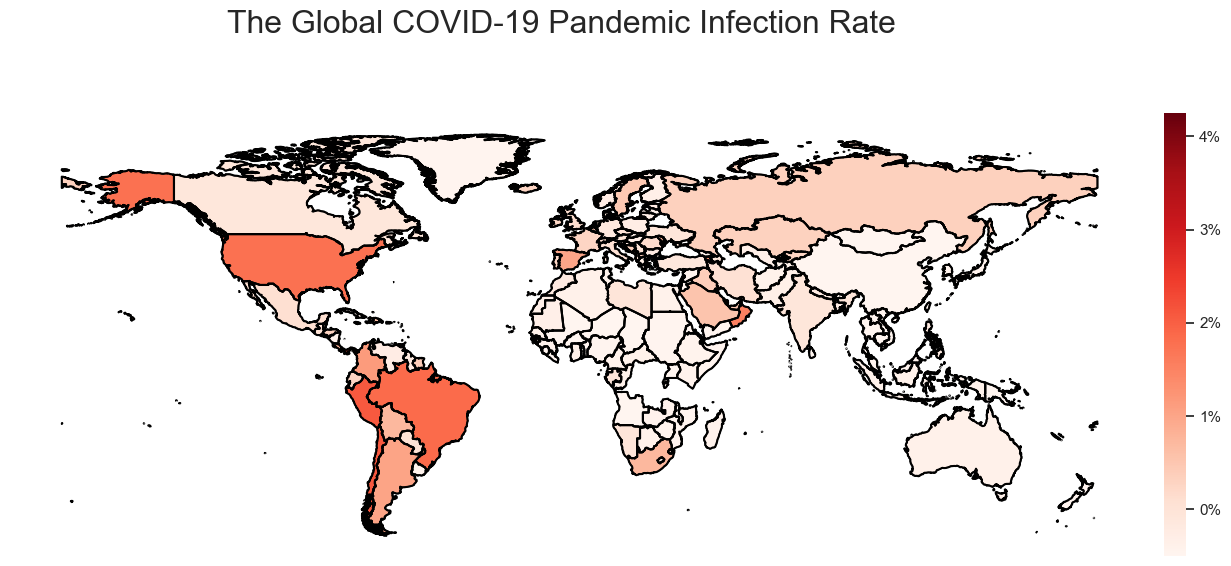

In [13]:
# Set seabor style

fig, ax = plt.subplots(1, 1, figsize=[14.70, 7.27])

# Add boundries
world_cases_pop.boundary.plot(ax=ax, color='black', figsize=0.2)

# Creat world map
world_cases_pop.plot(column='infection_ratio', ax=ax, legend=False, edgecolor='black', cmap='Reds')

fig.suptitle('The Global COVID-19 Pandemic Infection Rate', fontsize=23, y = 0.95) # Add ttile

sb.despine(ax=ax, left=True, bottom=True) # Remove plot borders

ax.set_xticks(ticks=[]) # Remove x ticks
ax.set_yticks(ticks=[]) # Remove y ticks

# Create custome colorbar
vmin, vmax = -0.5, 4.25
fig = ax.get_figure()
cax = fig.add_axes([0.91, 0.199, 0.015, 0.609])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = [0, 1, 2, 3, 4]
cbar = fig.colorbar(sm, cax=cax)

# Customize colorbar ticks and labels
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_ticklabels(['0%', '1%', '2%', '3%', '4%'])

cbar.outline.set_visible(False) # Remove colorbar border color

<img src="src/cong.gif" width="800" height="600">